In [1]:
import os
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import pandas as pd
# from  tkinter import *
# from  tkinter import ttk
from tqdm import tqdm
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException

from datetime import date


import sys
from datetime import datetime , timedelta, date
import win32com.client as win32
import time
from datetime import date
from dateutil.relativedelta import relativedelta

ModuleNotFoundError: No module named 'pandas'

In [2]:
login = '05181351360'
senha = 'Cosampa@123'
url ='https://parceiros.enel.com.br/Account/Login.aspx'
assunto = 'Geração dos Links Cosampa - Enel'
caminho_arquivo = r'C:\ENEL\BASE_DASH_ENEL'

In [3]:
#função para enviar e-mails com autenticação
nm_erros=[]
email_erros=[]

#def enviar_email_autenticado(assunto,contato,caminho,html):
def enviar_email_autenticado(assunto,html):

    # criar integração com o outlook
    outlook = win32.Dispatch('outlook.application')
    # criar um e-mail
    email = outlook.CreateItem(0)

    # Para quem vai o e-mail // Assunto da mensagem
    email.SentOnBehalfOfName='naorespoda@cosampa.com.br'
    email.To = 'Thiago.holandarm@hotmail.com ;bruno@brsolut.com'
    #email.bcc ='Thiago.holandarm@hotmail.com ;bruno@brsolut.com'
    email.Subject = assunto
    #email.Display()
    
    # Corpo da mensagem
    #caminho = '{}\Analitico_Enel_Cosampa.xlsx'.format(caminho)
    email.HTMLBody=html
    #email.Attachments.Add(caminho)
    time.sleep(1)
    
   

    try:
        email.Send()
    except:
        nm_erros.append(assunto)
        email_erros.append(contato)

In [4]:

def html():
    
    hora=int(datetime.strftime(datetime.now(),'%H'))
    add_mes = date.today() + relativedelta(months=+1)
    add_mes=datetime.strftime(add_mes,'%m/%Y')
    add_mes

    if hora < 12:
        periodo = 'Bom dia!'
    elif hora < 17:
        periodo = 'Boa tarde!'
    else:
        periodo = 'Boa noite!'


    texto=f'''
    <html>

    <p> <h3>Prezados, {periodo} </h3> </p> 

        <div> Primeira parte concluída </strong>. </div>


        <font  face="NewJuneBold">
    
    <p></p>
    <p></p>


             <div color='green'>
             <p></p>
                 Atenciosamente, 
                 <h3><font color="#000080">(</font> brsolut <font color="#000080">)</font></h3>
             </div>



       
    </html>

    '''
    return texto

In [5]:

def abrirDriver(senha,login):
    # options = webdriver.ChromeOptions()
    # options.add_experimental_option("prefs", {
    #     "download.default_directory": r"C:\Users\thiag\Downloads",
    #     "download.prompt_for_download": False,
    #     "download.directory_upgrade": True,
    #     "safebrowsing.enabled": True
    # })
    # #options.add_argument("--headless")
    
    ''' esse metodo não esta funcionando nessa máquina
        servico = Service(ChromeDriverManager().install())
        # driver = webdriver.Chrome(service=servico, options=options)
        driver = webdriver.Chrome(service=servico)
   '''
 
    # login = '05181351360'
    # senha = 'Cosampa@123'
    #PAGINA DE LOGIN
    driver = webdriver.Chrome(executable_path=r'C:\Users\BRSolut\Desktop\Enel Cosampa\chromedriver.exe')
    
    driver.get(r'https://parceiros.enel.com.br/Account/Login.aspx')
    
    time.sleep(5)
    
    #VERIFICA SE O CAMPO LOGIN ESTA VISÍVEL
    while len(driver.find_elements(By.ID,'MainContentLogin_tbLogin'))<1:
        #time.sleep(1)
        driver.get(r'https://parceiros.enel.com.br/Account/Login.aspx')
        
    
    #VERIFICA SE O CAMPO SENHA ESTA VISÍVEL
    while len(driver.find_elements(By.ID,'MainContentLogin_tbSenha'))<1:
        time.sleep(1)

    #VERIFICA SE O BOTÃO ESTA VISÍVEL
    while len(driver.find_elements(By.ID,'MainContentLogin_lbEntrar'))<1:
        time.sleep(1)

    
    
    #LIMPAR OS CAMPOS
    driver.find_element(By.ID,"MainContentLogin_tbLogin").clear()
    driver.find_element(By.ID,"MainContentLogin_tbSenha").clear()

    #DIGITA LOGIN 
    driver.find_element(By.ID,"MainContentLogin_tbLogin").send_keys(login)
    #DIGITA SENHA
    driver.find_element(By.ID,"MainContentLogin_tbSenha").send_keys(senha)
    

    #CLICA NO BOTÃO DE LOGIN
    driver.find_element(By.ID,"MainContentLogin_lbEntrar").click()
    time.sleep(1)
    
    # PAGINA DE COLABORADORES
    driver.get(r'https://parceiros.enel.com.br/Pages/PageContratoTrabalho/Index.aspx')
    time.sleep(3)
    
    
    #AGUARDAR O BOTÂO DE SELEÇÃO DE QDE APARECER
    contador0=0
    while len(driver.find_elements(By.XPATH,'//*[@id="tbContratoTrabalho_length"]/label/select')) <1:
        contador0 = contador0 +1
        time.sleep(1)
        if contador0 >= 30:
            driver.get(r'https://parceiros.enel.com.br/Pages/PageContratoTrabalho/Index.aspx')
            
    
    
    selecao_valores_0=driver.find_element(By.XPATH,'//*[@id="tbContratoTrabalho_length"]/label/select')
    selecao_valores_1=selecao_valores_0.find_elements(By.TAG_NAME,'option')
    for i in selecao_valores_1:
        if int(i.text) == 50:
            i.click()
    
    
    
    
    return driver

In [7]:
#ABRE O NAVEGADOR
print('ABRINDO NAVEGADOR')
driver=abrirDriver(senha=senha,login=login)

ABRINDO NAVEGADOR


C:\Users\BRSolut\AppData\Local\Temp\ipykernel_9692\369147494.py:20: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=r'C:\Users\BRSolut\Desktop\Enel Cosampa\chromedriver.exe')


NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=112.0.5615.138)
Stacktrace:
Backtrace:
	(No symbol) [0x0086DCE3]
	(No symbol) [0x008039D1]
	(No symbol) [0x00714DA8]
	(No symbol) [0x006FD0D3]
	(No symbol) [0x0075EA8B]
	(No symbol) [0x0076D093]
	(No symbol) [0x0075ACC6]
	(No symbol) [0x00736F68]
	(No symbol) [0x007380CD]
	GetHandleVerifier [0x00AE3832+2506274]
	GetHandleVerifier [0x00B19794+2727300]
	GetHandleVerifier [0x00B1E36C+2746716]
	GetHandleVerifier [0x00916690+617600]
	(No symbol) [0x0080C712]
	(No symbol) [0x00811FF8]
	(No symbol) [0x008120DB]
	(No symbol) [0x0081C63B]
	BaseThreadInitThunk [0x76040099+25]
	RtlGetAppContainerNamedObjectPath [0x771C7B6E+286]
	RtlGetAppContainerNamedObjectPath [0x771C7B3E+238]


In [ ]:
#SELECIONA 50 ITENS NA TELA
def mudar_50():
    

    selecao_valores_0=driver.find_element(By.XPATH,'//*[@id="tbContratoTrabalho_length"]/label/select')
    selecao_valores_1=selecao_valores_0.find_elements(By.TAG_NAME,'option')
    for i in selecao_valores_1:
        if int(i.text) == 50:
            i.click()
    
    time.sleep(5)

In [ ]:


def seletor():
    
    
    
    contador = 0
    while len(driver.find_elements(By.ID,r'tbContratoTrabalho_paginate')) <1:
        time.sleep(1)
        contador = contador + 1
        if contador >=50:
            pass
    
    seletor_paginas_0 =driver.find_element(By.ID,r'tbContratoTrabalho_paginate')
    seletor_paginas_1 =seletor_paginas_0 .find_elements(By.TAG_NAME,'li')
    
    # SELECIONA A CLASSE DO BOTÃO , QUANDO O BOTÂO ESTA INATIVO A CLASSE RETORNA UM VALOR DIFERENTE DE 'next'
    # ESSE VALOR É UTILIZADO PARA INTERROMPER O LOOP NA ULTIMA PÁGINA  
    texto = seletor_paginas_1[6].get_attribute('class') 
    
    sair = 0
    contador =0
    while sair <= 0 or contador <=30:
        try:
            if texto == 'next':
                #SE O BOTÂO ESTIVER ATIVO EFETUO O CLICK PARA PRÓXIMA PÁGINA
                driver.find_element(By.XPATH,r'//*[@id="tbContratoTrabalho_paginate"]/ul/li[7]/a').click()
                #PAUSE PARA O CARREGAMENTO DA PAG.        
                time.sleep(1)
                sair =1
                contador = contador +1
                return texto
        except:
            contador = contador +1
            pass
        

    if contador >= 30:
        texto = 'sair'
    
    
    
    return texto

In [ ]:
#CHAMA A FUNÇÃO
#mudar_50()


#BUSCA A INFORMAÇÃO COM A QUANTIDADE DE REGISTROS, CONFORME PRINT ABAIXO
#EX: 6.371
qde_loop=driver.find_element(By.ID,'tbContratoTrabalho_info').text
qde_loop = qde_loop[23:29]
range_loop=int(qde_loop.strip().replace(".",""))/50

#ARREDONDA PARA BAIXO
#EX: 128,4 => 128
range_loop= int(range_loop+1)

  

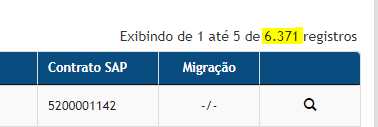

In [ ]:
#LISTA PARA ARMAZENAR AS INFOS
informacoes_colaborador=[]

#VARIÁVEL UTILIZADA NO FOR
texto = 'next'

#VARIÁVEL UTILIZADA COMO IDENTIFICADOR DA PÁGINA DENTRO DO DF , ELA É ATUALIZADA A CADA MUDANÇA DE PAG
pag=1

#ENCERRA O LOOP
kill = 0


#O LOOP SERÁ EXECUTADO ENQUANTO O BOTÂO PRÓXIMO ESTIVER ATIVO 
while texto == 'next':
    
    #SELECIONA A TABELA COM AS INFORMAÇÕES
    
    time.sleep(1)

    #VERIFICA SE A TABELA JA ESTA VISÍVEL
    contador0 = 0
    while len(driver.find_elements(By.ID,'tbContratoTrabalho'))<1:
        time.sleep(1)
        contador0 = contador0 +1
        if contador0 >= 70 and kill == 0:
            
            #CASO A TABELA TENHA CRASHADO INICIAMOS NOVAMENTE A EXTRAÇÃO
            driver.get(r'https://parceiros.enel.com.br/Pages/PageContratoTrabalho/Index.aspx')
            
            mudar_50
            
            #ATRIBUI O VALOR 1 PARA VARIÁVEL KILL , COM ISSO NA PROXÍMA VEZ QUE DER ERRO ENCERRAREMOS O LOOP
            kill = 1
            
            #FINALIZA O WHILE INTERNO
            break
        else:
            break
            
    
    if len(driver.find_elements(By.ID,'tbContratoTrabalho'))>0:
        kill = 0
    

    if contador0 >= 70 and kill == 1:
        #ENCERRA O NAVEGADOR
        driver.close()

        #ATRIBUI 2 PARA A VARIAVEL KILL , COM ISSO NÃO SERA GERADO UM ARQUIVO EXCEL
        kill =2
        
        #ENCERRRA O LOOP PRINCIPAL
        break

    #VERIFICA SE OS ELEMENTOS ESTÃO VISÍVEIS DENTRO DA TABELA
    contador1 = 0
    while len(driver.find_elements(By.TAG_NAME,"tbody"))<1:
        time.sleep(1)
        contador1 = contador1 +1
        if contador1 >= 40:
            break

    tabela_central = driver.find_elements(By.TAG_NAME,"tbody")
  
    
     #VERIFICA SE OS ELEMENTOS ESTÃO VISÍVEIS
    contador2 = 0
    while len(tabela_central[0].find_elements(By.TAG_NAME,"tr"))<1:
        time.sleep(1)
        contador2 = contador2 +1
        if contador2 >= 40:
            break
    
    if contador1 >= 40 or contador2 >= 40 :
        #ENCERRA O NAVEGADOR
        driver.close()

        #ATRIBUI 2 PARA A VARIAVEL KILL , COM ISSO NÃO SERA GERADO UM ARQUIVO EXCEL
        kill =2

        #ENCERRRA O LOOP PRINCIPAL
        break
        
    #ENTRA NAS LINHAS DA TABELA
    linhas = tabela_central[0].find_elements(By.TAG_NAME,"tr")
   
    print('Pagina :',pag ,' de ',range_loop," tamanho :",len(informacoes_colaborador))
    

    #LOOP DENTRO DAS CÉLULAS DAS LINHAS
    #for i,linha in enumerate(tqdm(linhas)):
    for i,linha in enumerate(linhas):
       
        
        
        while len(linha.find_elements(By.TAG_NAME,'td'))<1:
            time.sleep(0.2)
            
        celulas=linha.find_elements(By.TAG_NAME,'td')
        informacoes=[]
        
        try :

            #ARMAZENA O LINK
            informacoes.append(celulas[7].find_element(By.TAG_NAME,'a').get_attribute('href'))   
            
            #ARMAZENA A INFORMAÇÂO DO STATUS
            informacoes.append(celulas[3].text)
            
            #INFORMAÇÂO DA PAG ATUAL
            informacoes.append(pag)

            #ALIMENTA A LISTA PRINCIPAL
            informacoes_colaborador.append(informacoes)
            #time.sleep(0.5)
            #print(i)"
        except:
            pass
            
           
    texto = seletor()
   
    #time.sleep(0.5)
    pag = pag +1
    
    

In [ ]:
if kill != 2:
    df_funcionarios=pd.DataFrame(informacoes_colaborador).drop_duplicates()
    df_funcionarios.columns=['pag','Status','Link']
    df_funcionarios=df_funcionarios[df_funcionarios['Status'] != 'Contrato Encerrado']
    df_funcionarios=df_funcionarios[df_funcionarios['Status'] != 'Afastado INSS']
    df_funcionarios=df_funcionarios.reset_index()
    df_funcionarios=df_funcionarios[['pag','Status','Link']]
    df_funcionarios.to_excel(r'{}\links.xlsx'.format(caminho_arquivo))
    #df_funcionarios.to_excel(r'c:\Users\thiag\Downloads\links.xlsx')
    enviar_email_autenticado(assunto=assunto,html=html())


In [ ]:
 driver.close()

In [ ]:
#enviar_email_autenticado(assunto=assunto,html=html())

In [ ]:
df_funcionarios